In [1]:
#==========Imports==========
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time

import Bell_EBM as ebm

In [2]:
#==========Set Up System==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3, nlat = 16)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

In [21]:
#==========Baseline Creation==========
bUpdates = 100000. #Amount of timesteps in baseline
bOrbits = 4 #Number of orbits in baseline

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*bOrbits
dt = system.planet.Porb/bUpdates
baselineMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
baselineLightcurve = system.lightcurve()

In [47]:
#==========Test Creation==========
tUpdates = 100. #Amount of timesteps in baseline
tOrbits = 1 #Number of orbits in baseline

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*tOrbits
dt = system.planet.Porb/tUpdates
testMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
testLightcurve = system.lightcurve()

(array([ 64.,  27.,  20.,  18.,  16.,  14.,  12.,  14.,  10.,  12.,  10.,
         10.,  10.,  10.,  10.,   8.,  10.,   8.,   8.,   9.,   8.,   9.,
          8.,   8.,   8.,   8.,   7.,   7.,   8.,   8.,   8.,   8.,   8.,
          8.,   8.,   9.,   8.,   9.,  10.,  10.,  10.,  11.,  12.,  13.,
         16.,  17.,  22.,  34.,  60., 340.]),
 array([-0.74902043, -0.73410834, -0.71919626, -0.70428417, -0.68937209,
        -0.67446001, -0.65954792, -0.64463584, -0.62972375, -0.61481167,
        -0.59989958, -0.5849875 , -0.57007541, -0.55516333, -0.54025124,
        -0.52533916, -0.51042707, -0.49551499, -0.4806029 , -0.46569082,
        -0.45077873, -0.43586665, -0.42095456, -0.40604248, -0.39113039,
        -0.37621831, -0.36130622, -0.34639414, -0.33148205, -0.31656997,
        -0.30165788, -0.2867458 , -0.27183371, -0.25692163, -0.24200954,
        -0.22709746, -0.21218537, -0.19727329, -0.1823612 , -0.16744912,
        -0.15253703, -0.13762495, -0.12271286, -0.10780078, -0.09288869,
 

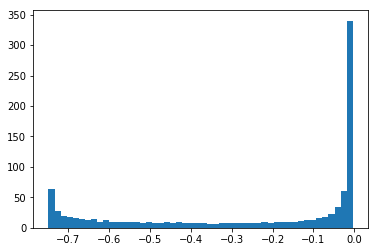

In [49]:
a = np.array([baselineLightcurve-testLightcurve])*1e6
x = a.flatten()
plt.hist(x, bins=50)

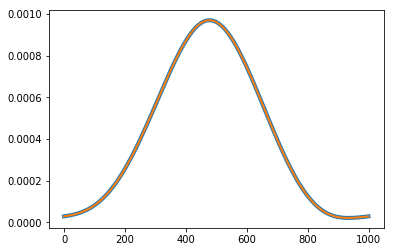

In [42]:
#baselineLightcurve, testLightcurve, baselineLightcurve - testLightcurve
plt.plot(testLightcurve, lw=4)
plt.plot(baselineLightcurve, lw=2)

Text(0.5, 1.0, 'test')

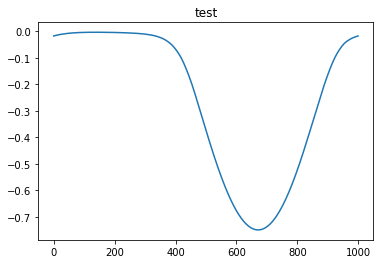

In [48]:
plt.plot((baselineLightcurve-testLightcurve)*1e6)
plt.title('test')

In [25]:
np.std(x)

1.6800288208541942e-09

In [3]:
#==========Baseline Creation==========
bUpdates = 10000. #Amount of timesteps in baseline
bOrbits = 1 #Number of orbits in baseline

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*bOrbits
dt = system.planet.Porb/bUpdates
baselineMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
baselineLightcurve = system.lightcurve()

In [10]:
#==========Tester Module==========

tStart = time.time()

# ---Variables---
nTests = 10 #Number of intervals ex: 100, 200, 300 updates is 3 intervals
nloop = 1 #Number of times the calculations are to be redone for avg
nStep = 100. #Step number ex: 100, 200, 300 updates is 100 step number

dataArray = np.zeros(shape=(5,nTests))

for j in range(0, nTests):
    cTimeSteps = nStep*(j+1) #Current amount of time steps
    ttcTotal = 0. #Used for avergaing time to compute
    #eMax = 0.
    #eTotal = np.zeros_like(system.planet.map.values)
    lcTotal = np.zeros_like(baselineLightcurve)
    
    #Averaging over nloop tests
    for i in range(0, nloop):
        Teq = system.get_teq()
        T0 = np.ones_like(system.planet.map.values)*Teq
        t0 = 0.
        t1 = t0+system.planet.Porb*1
        dt = system.planet.Porb/cTimeSteps
        testMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
        
        ttcTotal = ttcTotal + float(ttc)
        #eTotal = eTotal + testMaps
        lcTotal = lcTotal + (baselineLightcurve-system.lightcurve())
        #if (np.amax(np.absolute(testMaps))>eMax):
            #eMax = np.amax(np.absolute(baselineMaps-testMaps))
            
    ttcAvg = ttcTotal/nloop
    #eTotalavg = eTotal/nloop
    lcAvg = lcTotal/nloop
    
    dataArray[0,j] = ttcAvg #Time to Compute
    dataArray[1,j] = cTimeSteps #Time steps
    #dataArray[2,j] = (np.mean(np.absolute(baselineMaps-eTotalavg))) #Mean error on heat
    dataArray[3,j] = np.std(lcAvg) #STDDEV of LC
    dataArray[4,j] = np.mean(lcAvg) #Mean error on lightcurve
    
    #print('Accuracy lost at ' + str(cTimeSteps) + ' updates:' + str(np.mean(np.absolute(baselineMaps-eTotalavg))))
    #print('Max accuracy lost at ' + str(cTimeSteps) + ' updates:' + str(eMax))
    print('Avergae time to compute at ' + str(cTimeSteps)+ ' updates: ' + str(ttcAvg))
    print('Accuracy lost (LC) at ' + str(cTimeSteps) + ' updates:' + str(dataArray[4,j]))
    print('----------')
    
tEnd = time.time()
tTotal = tEnd - tStart

print('Total computational time: ' + str(tTotal/60) + ' minutes')

Avergae time to compute at 100.0 updates: 0.02777695655822754
Accuracy lost (LC) at 100.0 updates:6.793089202321517e-08
----------
Avergae time to compute at 200.0 updates: 0.04799199104309082
Accuracy lost (LC) at 200.0 updates:3.314961534256058e-08
----------
Avergae time to compute at 300.0 updates: 0.07261919975280762
Accuracy lost (LC) at 300.0 updates:2.1775370878995345e-08
----------
Avergae time to compute at 400.0 updates: 0.09314203262329102
Accuracy lost (LC) at 400.0 updates:1.6127117897342962e-08
----------
Avergae time to compute at 500.0 updates: 0.13839983940124512
Accuracy lost (LC) at 500.0 updates:1.275033918970494e-08
----------
Avergae time to compute at 600.0 updates: 0.145219087600708
Accuracy lost (LC) at 600.0 updates:1.0504166543683907e-08
----------
Avergae time to compute at 700.0 updates: 0.1708071231842041
Accuracy lost (LC) at 700.0 updates:8.902194783323366e-09
----------
Avergae time to compute at 800.0 updates: 0.18718695640563965
Accuracy lost (LC) at

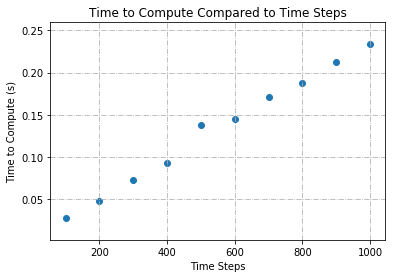

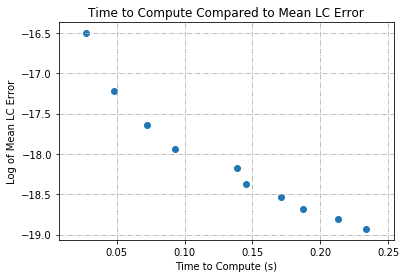

In [11]:
y = dataArray[0,:]
x = dataArray[1,:]
plt.scatter(x, y)
plt.xlabel("Time Steps")
plt.ylabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Time Steps')
plt.grid(True, linestyle='-.')
plt.show()

useLog = True
x = dataArray[0,:]
if useLog == True:
    y = np.log(dataArray[4,:])
    plt.ylabel("Log of Mean LC Error")
else:
    y = dataArray[4,:]
    plt.ylabel("Mean LC Error")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    lim = (np.amax(dataArray[4,:]))*1.2
    plt.ylim(bottom=0, top = lim) 
    
plt.scatter(x, y)
plt.xlabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Mean LC Error')
plt.grid(True, linestyle='-.')
plt.show()

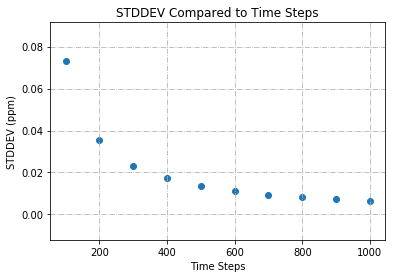

In [9]:
y = (dataArray[3,:])*1e6
x = dataArray[1,:]
plt.scatter(x, y)
plt.xlabel("Time Steps")
plt.ylabel("STDDEV (ppm)")
plt.title('STDDEV Compared to Time Steps')
plt.grid(True, linestyle='-.')
plt.show()